In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/chicago_crime_final.csv')

In [ ]:
df.isna().sum()

,0
ID,0
Case Number,0
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,13853
Arrest,0
Domestic,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8276672 entries, 0 to 8276671
Data columns (total 26 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
 22  geometry              object 
 23  Communi

In [ ]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'geometry', 'Community Area Name', 'F_Date', 'Time',
       'Period', 'Quarter'],
      dtype='object')

In [ ]:
df[['Community Area Name', 'Community Area']]

,Community Area Name,Community Area
0,Roseland,49.0
1,Roseland,49.0
2,West Pullman,53.0
3,Jefferson Park,11.0
4,Gage Park,63.0
...,...,...
8276667,Near North Side,8.0
8276668,Lincoln Park,7.0
8276669,Humboldt Park,23.0
8276670,Armour Square,34.0


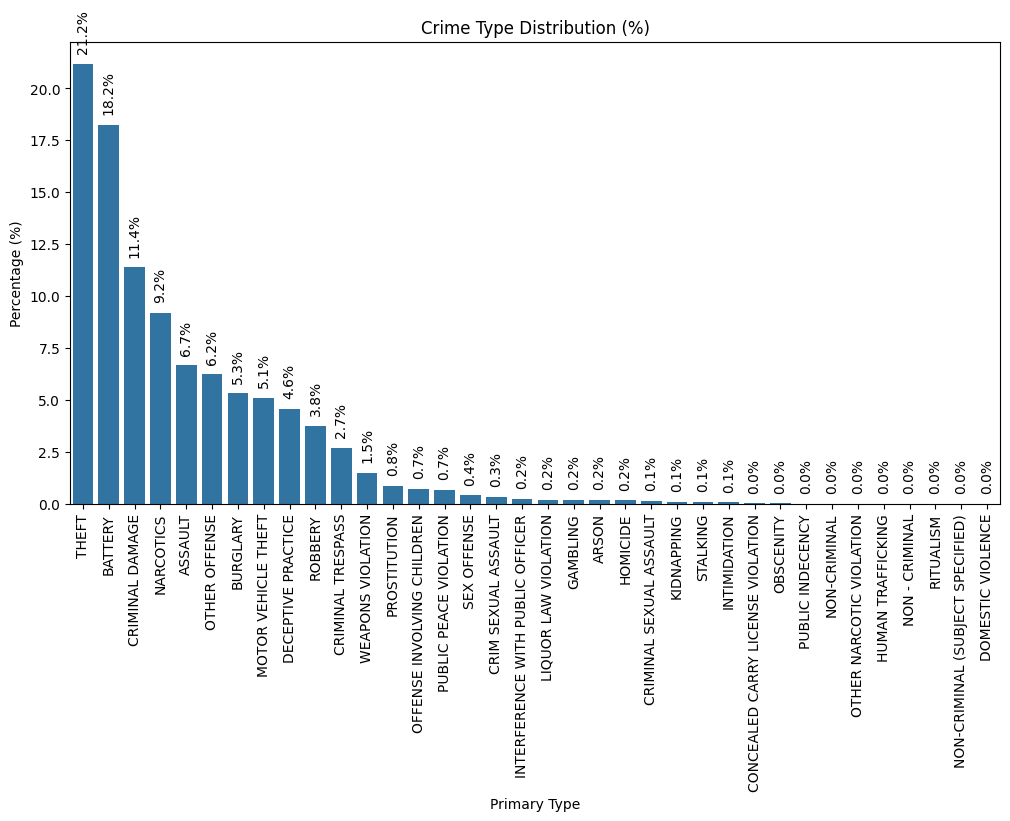

In [ ]:
# 범죄 유형의 분포
import seaborn as sns
import matplotlib.pyplot as plt

# 범죄 유형별 발생 비율(%) 계산
crime_counts = df['Primary Type'].value_counts(normalize=True).sort_values(ascending=False) * 100  # % 변환

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=crime_counts.index, y=crime_counts.values)

# 그래프 제목 및 축 라벨 추가
plt.title('Crime Type Distribution (%)')
plt.xlabel('Primary Type')
plt.ylabel('Percentage (%)')

# x축 라벨 회전 (글자가 겹치는 것을 방지)
plt.xticks(rotation=90)

# 막대 위에 비율 값 세로(90도)로 표시
for i, v in enumerate(crime_counts.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', va='bottom', rotation=90, fontsize=10)

plt.show()

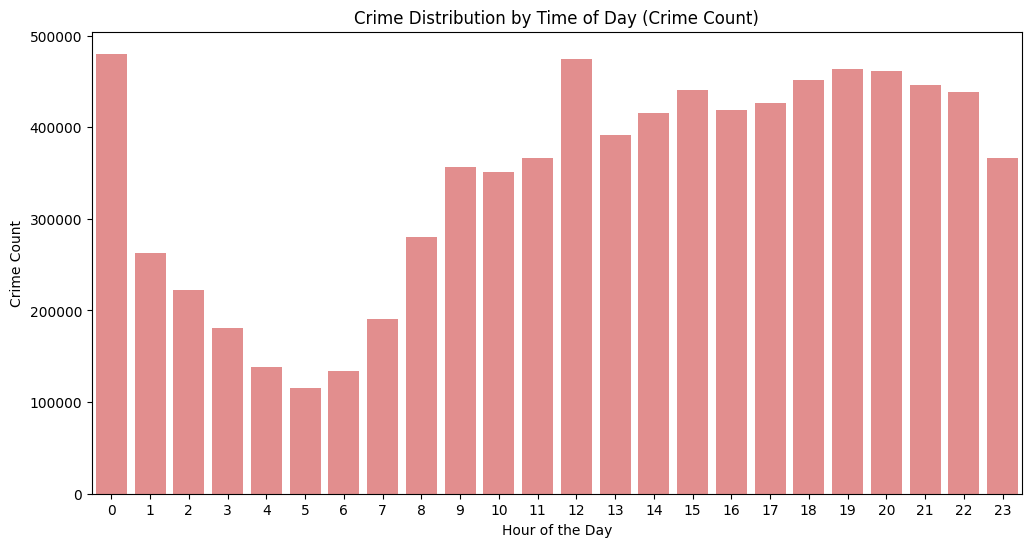

In [ ]:
# 'Date' 열을 datetime 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'])

# 'Hour' 열 생성 (datetime 변환된 상태에서만 가능)
df['Hour'] = df['Date'].dt.hour

# 시간대별 범죄 발생 건수 계산
crime_counts = df['Hour'].value_counts().sort_index()  # 건수로 계산

# 0시부터 23시까지 모든 시간대 표시
full_hours = pd.Series([0] * 24, index=range(24))
crime_counts = full_hours.add(crime_counts, fill_value=0)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=crime_counts.index, y=crime_counts.values, color='lightcoral')

# 그래프 제목 및 축 라벨 추가
plt.title('Crime Distribution by Time of Day (Crime Count)')
plt.xlabel('Hour of the Day')
plt.ylabel('Crime Count')

plt.show()

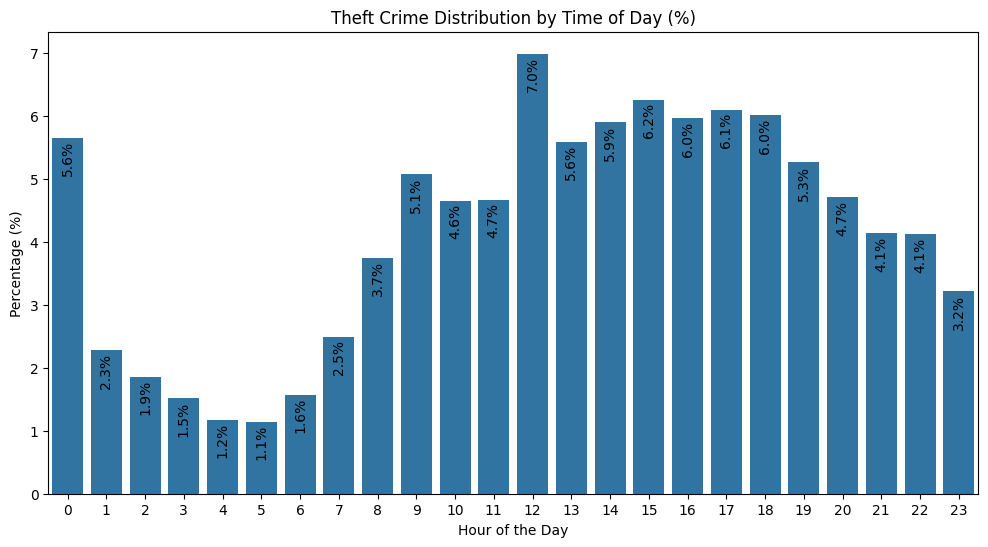

In [ ]:
# THEFT가 일어난시간대
import seaborn as sns
import matplotlib.pyplot as plt

# 'Primary Type'이 'THEFT'인 데이터만 필터링
theft_df = df[df['Primary Type'] == 'THEFT'].copy()

# 'Date' 열을 datetime 형식으로 변환
theft_df['Date'] = pd.to_datetime(theft_df['Date'])

# 'Hour' 열 생성 (datetime 변환된 상태에서만 가능)
theft_df['Hour'] = theft_df['Date'].dt.hour

# 시간대별 절도 범죄 발생 비율 계산
theft_counts = theft_df['Hour'].value_counts(normalize=True).sort_index() * 100  # 퍼센트 변환

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=theft_counts.index, y=theft_counts.values)

# 그래프 제목 및 축 라벨 추가
plt.title('Theft Crime Distribution by Time of Day (%)')
plt.xlabel('Hour of the Day')
plt.ylabel('Percentage (%)')

# 막대 위에 퍼센트 값 표시 (세로 정렬)
for i, v in enumerate(theft_counts.values):
    plt.text(i, v-0.6, f"{v:.1f}%", ha='center', va='bottom', rotation=90, fontsize=10)

plt.show()

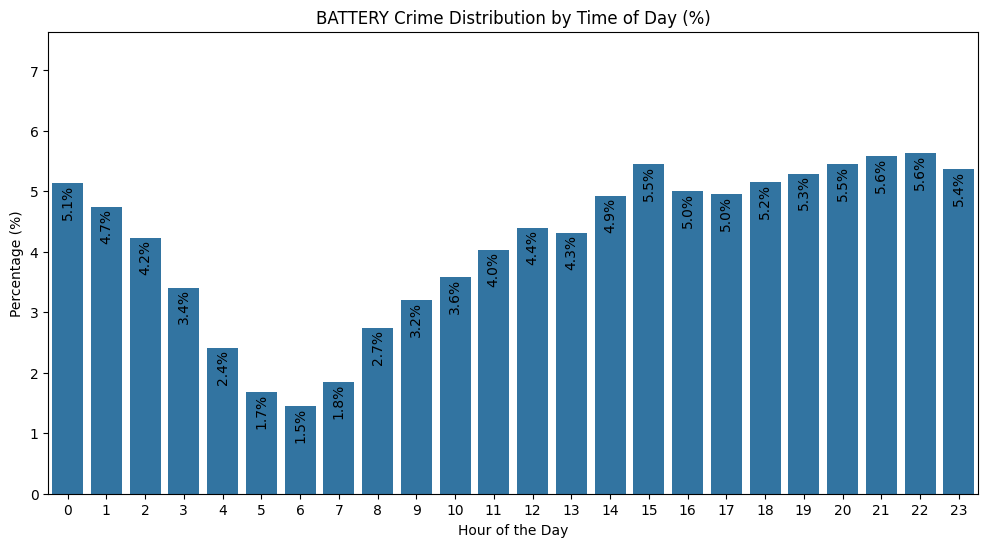

In [ ]:
# BATTERY가 일어난시간대
import seaborn as sns
import matplotlib.pyplot as plt

# 'Primary Type'이 'BATTERY'인 데이터만 필터링
BATTERY_df = df[df['Primary Type'] == 'BATTERY'].copy()

# 'Date' 열을 datetime 형식으로 변환 (만약 아직 변환되지 않았다면)
BATTERY_df['Date'] = pd.to_datetime(BATTERY_df['Date'])

# 'Hour' 열 생성
BATTERY_df['Hour'] = BATTERY_df['Date'].dt.hour

# 시간대별 BATTERY 범죄 발생 비율(%) 계산
BATTERY_counts = BATTERY_df['Hour'].value_counts(normalize=True).sort_index() * 100  # % 변환

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=BATTERY_counts.index, y=BATTERY_counts.values)

# 그래프 제목 및 축 라벨 추가
plt.title('BATTERY Crime Distribution by Time of Day (%)')
plt.xlabel('Hour of the Day')
plt.ylabel('Percentage (%)')

# y축 % 단위로 설정
plt.ylim(0, max(BATTERY_counts.values) + 2)

# 막대 위에 비율 값 표시 (세로 정렬)
for x, y in zip(BATTERY_counts.index, BATTERY_counts.values):
    plt.text(x, y -0.6, f"{y:.1f}%", ha='center', va='bottom', rotation=90, fontsize=10)

plt.show()

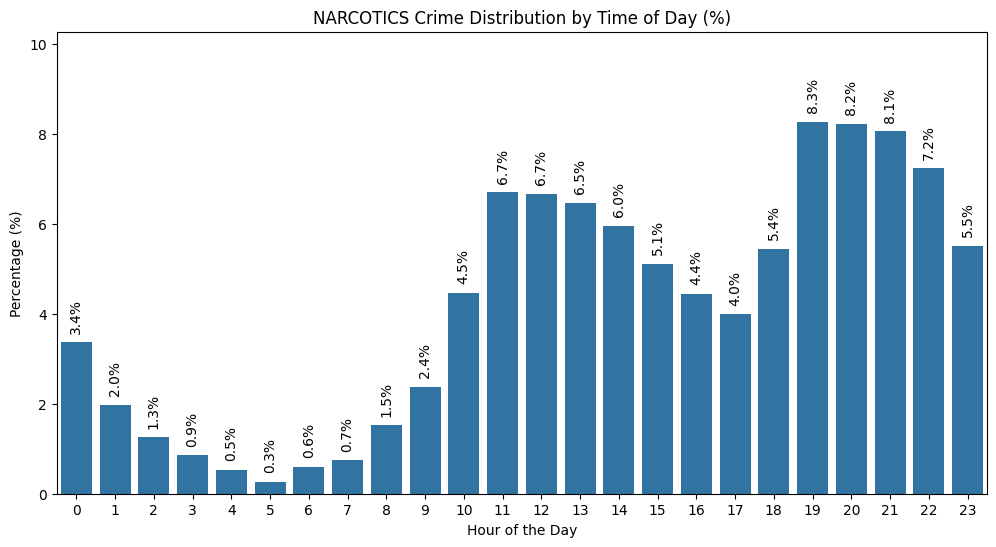

In [ ]:
# 'Primary Type'이 'NARCOTICS'인 데이터만 필터링
NARCOTICS_df = df[df['Primary Type'] == 'NARCOTICS'].copy()

# 'Date' 열을 datetime 형식으로 변환 (만약 아직 변환되지 않았다면)
NARCOTICS_df['Date'] = pd.to_datetime(NARCOTICS_df['Date'])

# 'Hour' 열 생성
NARCOTICS_df['Hour'] = NARCOTICS_df['Date'].dt.hour

# 시간대별 NARCOTICS 범죄 발생 비율(%) 계산
NARCOTICS_counts = NARCOTICS_df['Hour'].value_counts(normalize=True).sort_index() * 100  # % 변환

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=NARCOTICS_counts.index, y=NARCOTICS_counts.values)

# 그래프 제목 및 축 라벨 추가
plt.title('NARCOTICS Crime Distribution by Time of Day (%)')
plt.xlabel('Hour of the Day')
plt.ylabel('Percentage (%)')

# y축 % 단위로 설정
plt.ylim(0, max(NARCOTICS_counts.values) + 2)

# 막대 위에 비율 값 표시 (세로 정렬)
for x, y in zip(NARCOTICS_counts.index, NARCOTICS_counts.values):
    plt.text(x, y + 0.2, f"{y:.1f}%", ha='center', va='bottom', rotation=90, fontsize=10)

plt.show()

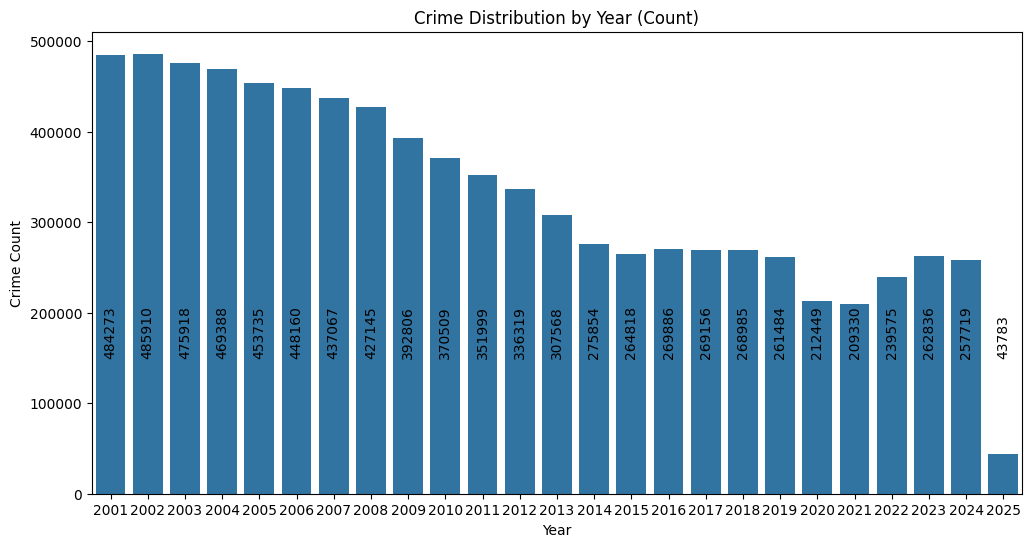

In [ ]:
# 연도별 범죄 발생 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 연도별 범죄 발생 수 계산
yearly_counts = df['Year'].value_counts().sort_index()  # 범죄 발생 수

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_counts.index, y=yearly_counts.values)

# 그래프 제목 및 축 라벨 추가
plt.title('Crime Distribution by Year (Count)')
plt.xlabel('Year')
plt.ylabel('Crime Count')

# 막대 위에 범죄 발생 수 표시
for i, v in enumerate(yearly_counts.values):
    plt.text(i, 150000, f"{v}", ha='center', va='bottom',rotation=90, fontsize=10)

plt.show()

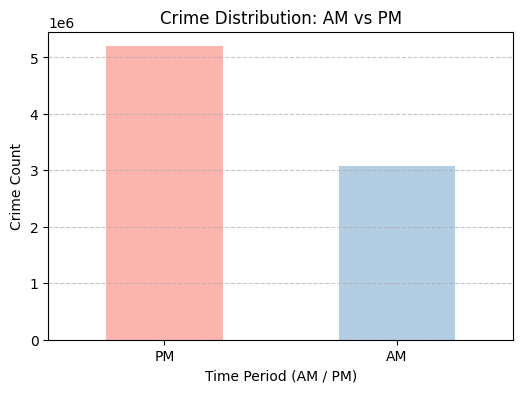

In [ ]:
# 'Time' 컬럼을 datetime 형식으로 변환 (시간 정보만 사용)
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

# 오전(AM)과 오후(PM) 구분
df['Period'] = df['Time'].apply(lambda x: 'AM' if x.hour < 12 else 'PM')

# 색상 팔레트 설정 (Pastel1)
palette_color = sns.color_palette('Pastel1')

# 시각화
plt.figure(figsize=(6, 4))
df['Period'].value_counts().plot(kind='bar', color=palette_color)

plt.xlabel("Time Period (AM / PM)")
plt.ylabel("Crime Count")
plt.title("Crime Distribution: AM vs PM")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

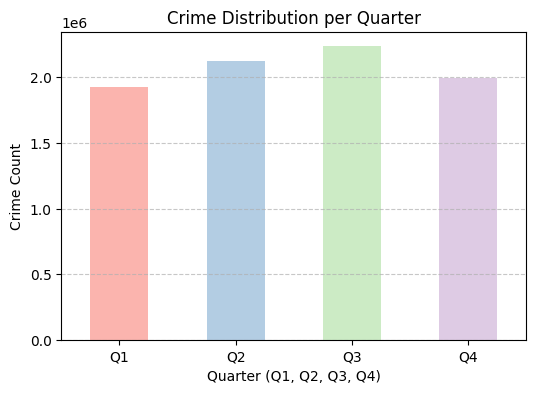

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'F_Date' 컬럼을 datetime 형식으로 변환
df['F_Date'] = pd.to_datetime(df['F_Date'])

# 월(Month) 기준으로 분기(Quarter) 할당
df['Quarter'] = df['F_Date'].dt.quarter

# 색상 팔레트 설정
palette_color = sns.color_palette('Pastel1')

# 분기별 범죄 발생 횟수 시각화
plt.figure(figsize=(6, 4))
df['Quarter'].value_counts().sort_index().plot(kind='bar', color=palette_color)

plt.xlabel("Quarter (Q1, Q2, Q3, Q4)")
plt.ylabel("Crime Count")
plt.title("Crime Distribution per Quarter")
plt.xticks(ticks=[0, 1, 2, 3], labels=['Q1', 'Q2', 'Q3', 'Q4'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


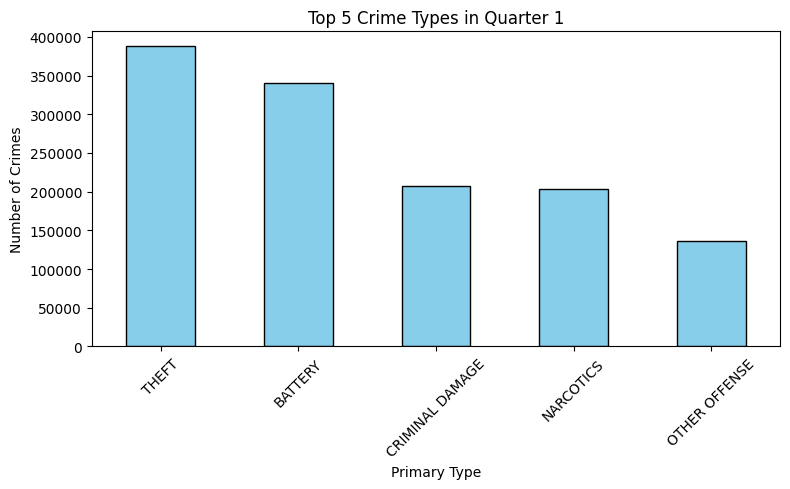

Primary Type
THEFT              387776
BATTERY            340343
CRIMINAL DAMAGE    207509
NARCOTICS          204012
OTHER OFFENSE      135791
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# 1분기 범죄수 Top5
top5_crimes_q1 = (
    df[df['Quarter'] == 1]['Primary Type']
    .value_counts()
    .head(5)
)

# 시각화
plt.figure(figsize=(8, 5))
top5_crimes_q1.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 Crime Types in Quarter 1')
plt.xlabel('Primary Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(top5_crimes_q1)

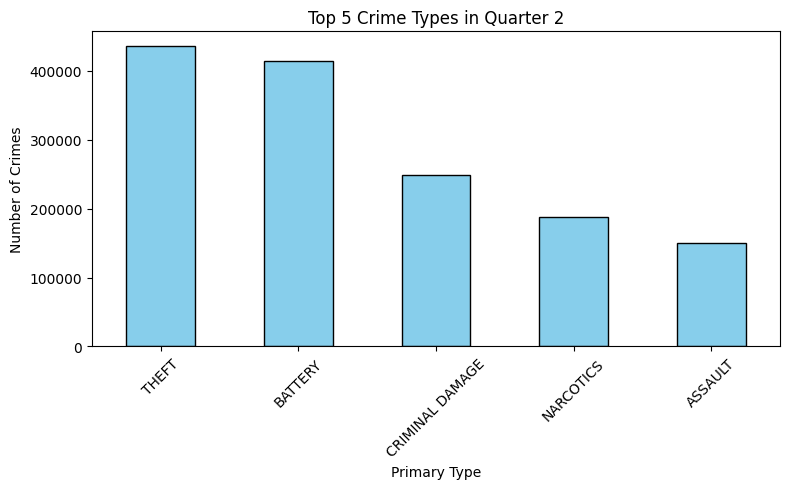

Primary Type
THEFT              435762
BATTERY            413969
CRIMINAL DAMAGE    248537
NARCOTICS          187585
ASSAULT            149913
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# 2분기 범죄수 Top5
top5_crimes_q2 = (
    df[df['Quarter'] == 2]['Primary Type']
    .value_counts()
    .head(5)
)

# 시각화
plt.figure(figsize=(8, 5))
top5_crimes_q2.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 Crime Types in Quarter 2')
plt.xlabel('Primary Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(top5_crimes_q2)

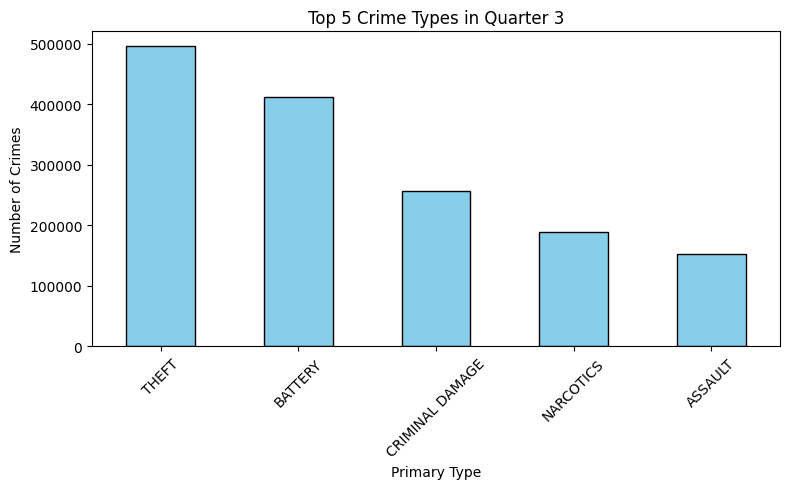

Primary Type
THEFT              496135
BATTERY            412267
CRIMINAL DAMAGE    256474
NARCOTICS          189973
ASSAULT            152267
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# 3분기 범죄수 Top5
top5_crimes_q3 = (
    df[df['Quarter'] == 3]['Primary Type']
    .value_counts()
    .head(5)
)

# 시각화
plt.figure(figsize=(8, 5))
top5_crimes_q3.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 Crime Types in Quarter 3')
plt.xlabel('Primary Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(top5_crimes_q3)

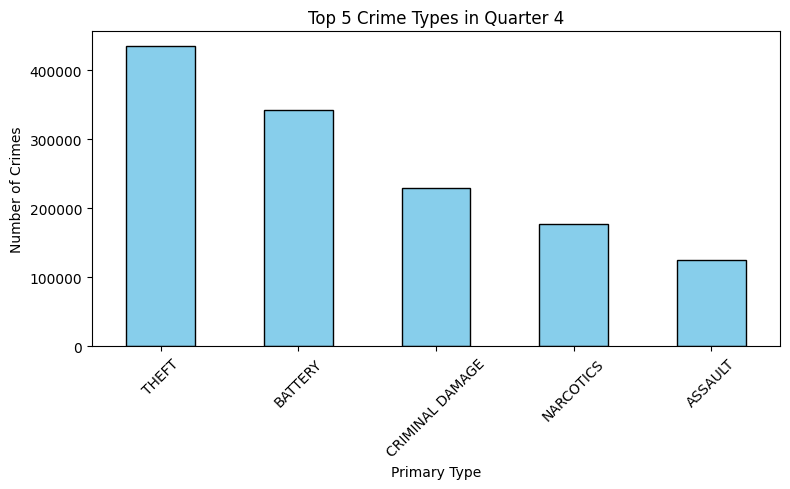

Primary Type
THEFT              434413
BATTERY            341892
CRIMINAL DAMAGE    229045
NARCOTICS          177740
ASSAULT            124686
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# 4분기 범죄수 Top5
top5_crimes_q4 = (
    df[df['Quarter'] == 4]['Primary Type']
    .value_counts()
    .head(5)
)

# 시각화
plt.figure(figsize=(8, 5))
top5_crimes_q4.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 Crime Types in Quarter 4')
plt.xlabel('Primary Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(top5_crimes_q4)

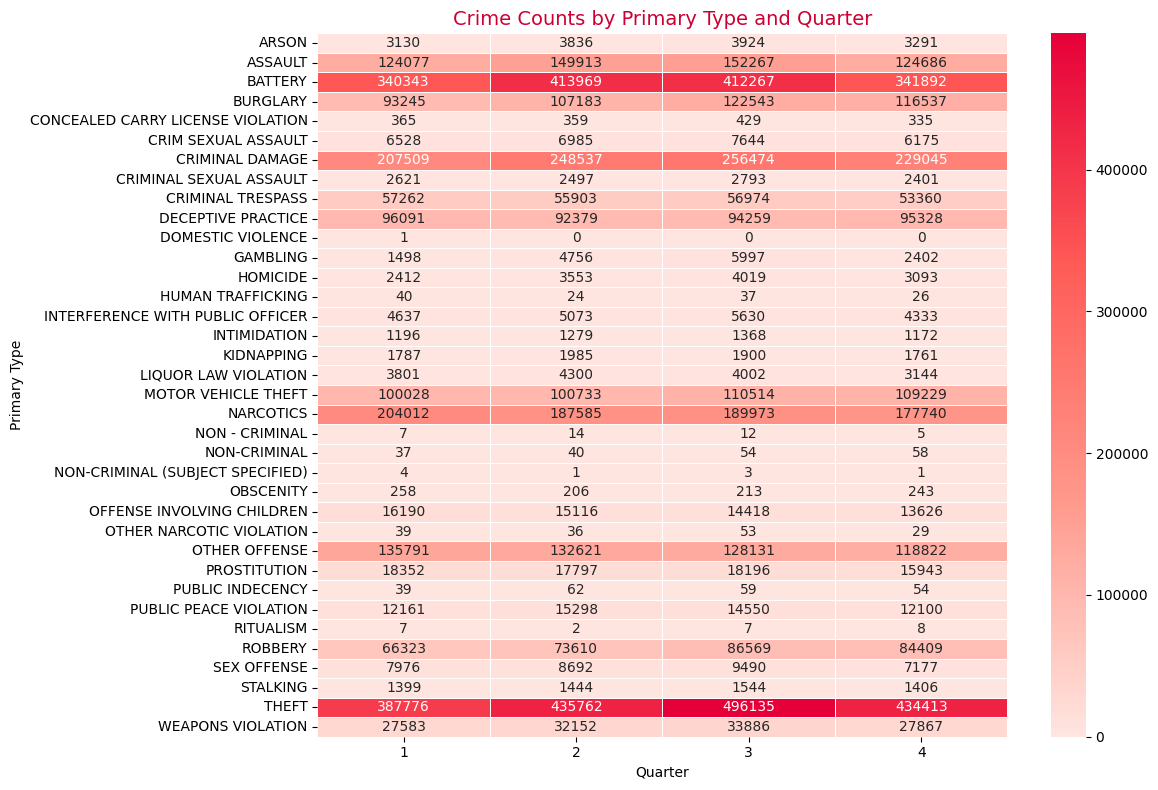

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd

# Quarter별 Primary Type 빈도수 테이블
heatmap_data = pd.crosstab(df['Primary Type'], df['Quarter'])

# 진한 코랄핑크 컬러맵
coral_deep_cmap = LinearSegmentedColormap.from_list(
    "deep_coral",
    ['#ffe5e0', '#ff998c', '#ff5c57', '#e60039']
)

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='d',
    cmap=coral_deep_cmap,
    linewidths=0.5,
    linecolor='white'
)
plt.title('Crime Counts by Primary Type and Quarter', fontsize=14, color='#cc0033')
plt.xlabel('Quarter')
plt.ylabel('Primary Type')
plt.tight_layout()
plt.show()


<ipython-input-46-59bee5b4f1a3>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=theft_quarter_counts.index, y=theft_quarter_counts.values, palette=palette_color)
<ipython-input-46-59bee5b4f1a3>:15: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.barplot(x=theft_quarter_counts.index, y=theft_quarter_counts.values, palette=palette_color)


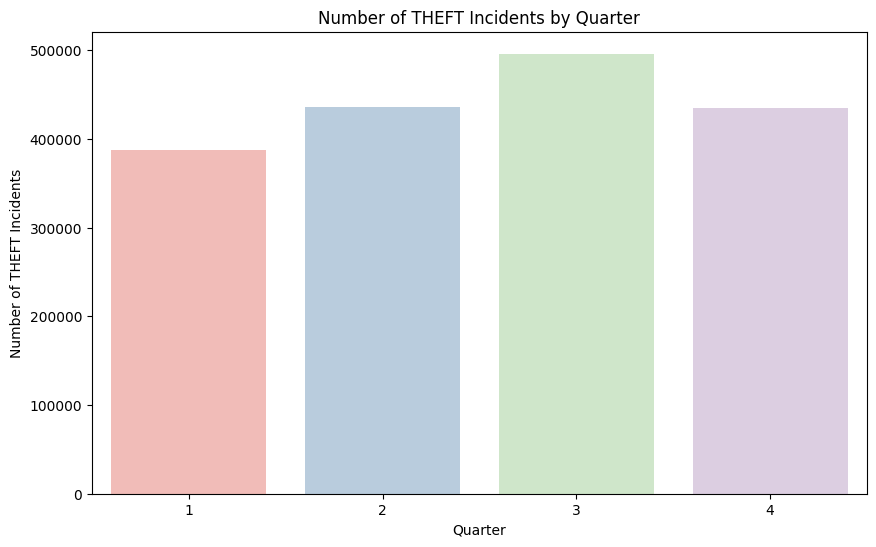

In [ ]:
# THEFT 범죄만 필터링
df_theft = df[df['Primary Type'] == 'THEFT'].copy()

# 월(Month) 기준으로 분기(Quarter) 할당
df_theft['Quarter'] = df_theft['F_Date'].dt.quarter

# 분기별로 THEFT 범죄 사건 수 집계
theft_quarter_counts = df_theft.groupby('Quarter').size()

# 색상 팔레트 설정 (Pastel1)
palette_color = sns.color_palette('Pastel1')

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=theft_quarter_counts.index, y=theft_quarter_counts.values, palette=palette_color)

plt.xlabel('Quarter')
plt.ylabel('Number of THEFT Incidents')
plt.title('Number of THEFT Incidents by Quarter')
plt.show()


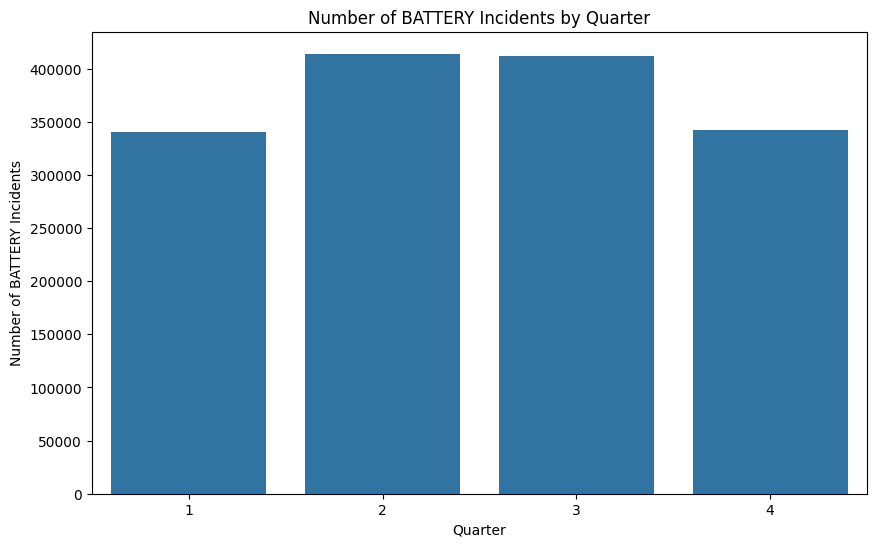

In [ ]:
# BATTERY 범죄만 필터링
df_battery = df[df['Primary Type'] == 'BATTERY'].copy()

# 월(Month) 기준으로 분기(Quarter) 할당
df_battery['Quarter'] = df_battery['F_Date'].dt.quarter

# 분기별로 BATTERY 범죄 사건 수 집계
battery_quarter_counts = df_battery.groupby('Quarter').size()

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=battery_quarter_counts.index, y=battery_quarter_counts.values)

plt.xlabel('Quarter')
plt.ylabel('Number of BATTERY Incidents')
plt.title('Number of BATTERY Incidents by Quarter')
plt.show()

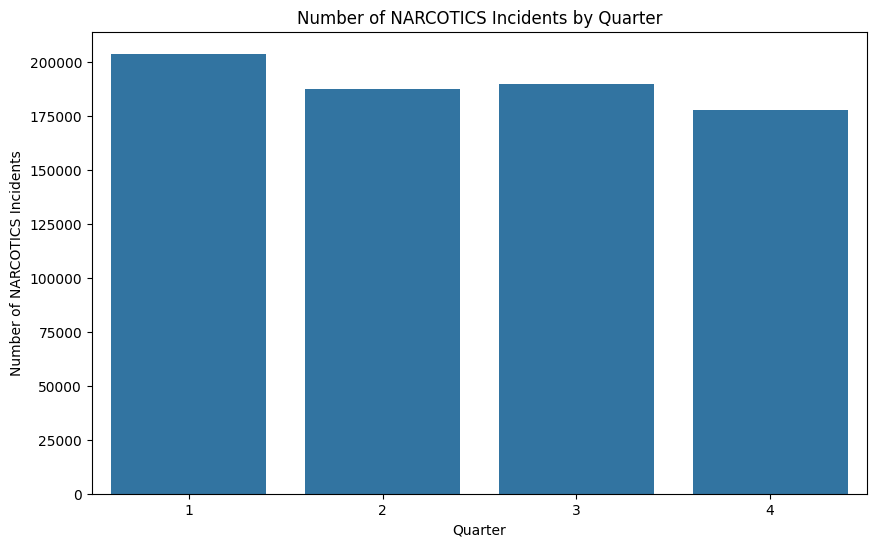

In [ ]:
# NARCOTICS 범죄만 필터링
df_narcotics = df[df['Primary Type'] == 'NARCOTICS'].copy()

# 월(Month) 기준으로 분기(Quarter) 할당
df_narcotics['Quarter'] = df_narcotics['F_Date'].dt.quarter

# 분기별로 NARCOTICS 범죄 사건 수 집계
narcotics_quarter_counts = df_narcotics.groupby('Quarter').size()

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=narcotics_quarter_counts.index, y=narcotics_quarter_counts.values)

plt.xlabel('Quarter')
plt.ylabel('Number of NARCOTICS Incidents')
plt.title('Number of NARCOTICS Incidents by Quarter')
plt.show()

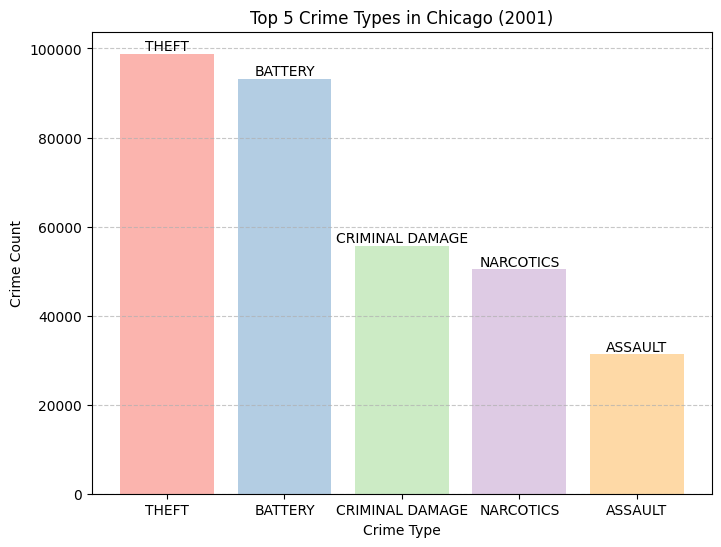

In [ ]:
# 2001년 데이터만 필터링
df_2001 = df[df['Year'] == 2001]

# 2001년 범죄 유형 개수 집계
crime_counts_2001 = df_2001.groupby('Primary Type').size().reset_index(name='Count')

# 상위 5개 범죄 유형 선택
top3_crimes_2001 = crime_counts_2001.nlargest(5, 'Count')

# 색상 팔레트 설정 (Pastel1)
palette_color = sns.color_palette('Pastel1', n_colors=5)

# 시각화
plt.figure(figsize=(8, 6))
plt.bar(top3_crimes_2001['Primary Type'], top3_crimes_2001['Count'], color=palette_color, alpha=1)

plt.xlabel("Crime Type")
plt.ylabel("Crime Count")
plt.title("Top 5 Crime Types in Chicago (2001)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 각 막대 위에 범죄 유형 라벨 추가
for i, row in top3_crimes_2001.iterrows():
    plt.text(row['Primary Type'], row['Count'], row['Primary Type'], ha='center', va='bottom', fontsize=10)

plt.show()

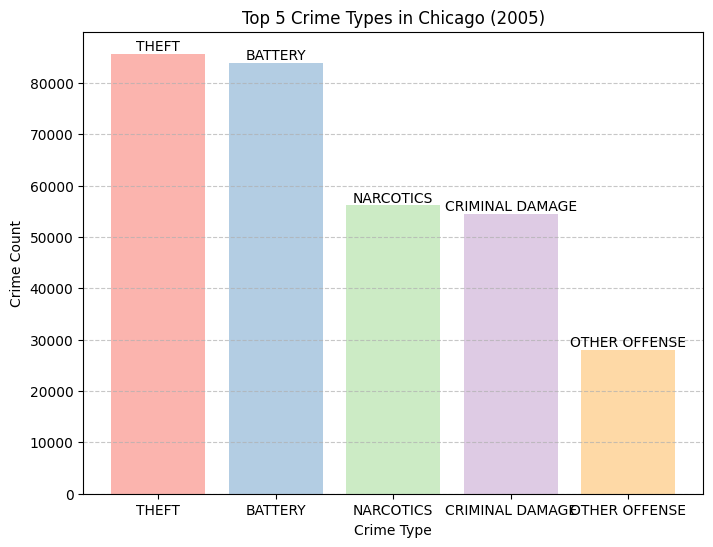

In [ ]:
# 2005년 데이터만 필터링
df_2005 = df[df['Year'] == 2005]

# 2001년 범죄 유형 개수 집계
crime_counts_2005 = df_2005.groupby('Primary Type').size().reset_index(name='Count')

# 상위 5개 범죄 유형 선택
top3_crimes_2005 = crime_counts_2005.nlargest(5, 'Count')

# 색상 팔레트 설정 (Pastel1)
palette_color = sns.color_palette('Pastel1', n_colors=5)

# 시각화
plt.figure(figsize=(8, 6))
plt.bar(top3_crimes_2005['Primary Type'], top3_crimes_2005['Count'], color=palette_color, alpha=1)

plt.xlabel("Crime Type")
plt.ylabel("Crime Count")
plt.title("Top 5 Crime Types in Chicago (2005)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 각 막대 위에 범죄 유형 라벨 추가
for i, row in top3_crimes_2005.iterrows():
    plt.text(row['Primary Type'], row['Count'], row['Primary Type'], ha='center', va='bottom', fontsize=10)

plt.show()

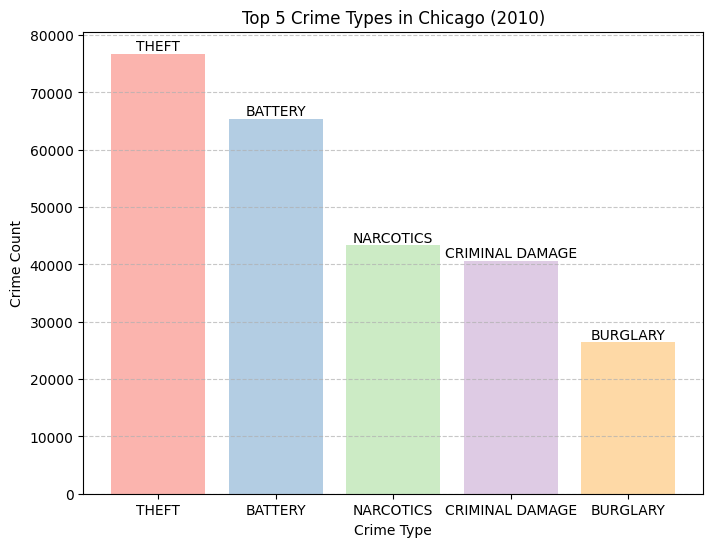

In [ ]:
# 2010년 데이터만 필터링
df_2010 = df[df['Year'] == 2010]

# 2010년 범죄 유형 개수 집계
crime_counts_2010 = df_2010.groupby('Primary Type').size().reset_index(name='Count')

# 상위 3개 범죄 유형 선택
top3_crimes_2010 = crime_counts_2010.nlargest(5, 'Count')

# 색상 팔레트 설정 (Pastel1)
palette_color = sns.color_palette('Pastel1', n_colors=5)

# 시각화
plt.figure(figsize=(8, 6))
plt.bar(top3_crimes_2010['Primary Type'], top3_crimes_2010['Count'], color=palette_color, alpha=1)

plt.xlabel("Crime Type")
plt.ylabel("Crime Count")
plt.title("Top 5 Crime Types in Chicago (2010)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 각 막대 위에 범죄 유형 라벨 추가
for i, row in top3_crimes_2010.iterrows():
    plt.text(row['Primary Type'], row['Count'], row['Primary Type'], ha='center', va='bottom', fontsize=10)

plt.show()

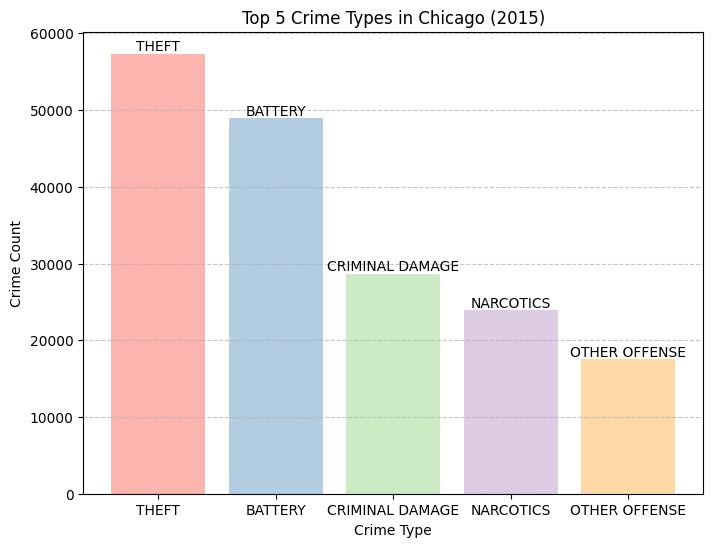

In [ ]:
# 2015년 데이터만 필터링
df_2015 = df[df['Year'] == 2015]

# 2015년 범죄 유형 개수 집계
crime_counts_2015 = df_2015.groupby('Primary Type').size().reset_index(name='Count')

# 상위 3개 범죄 유형 선택
top3_crimes_2015 = crime_counts_2015.nlargest(5, 'Count')

# 색상 팔레트 설정 (Pastel1)
palette_color = sns.color_palette('Pastel1', n_colors=5)

# 시각화
plt.figure(figsize=(8, 6))
plt.bar(top3_crimes_2015['Primary Type'], top3_crimes_2015['Count'], color=palette_color, alpha=1)

plt.xlabel("Crime Type")
plt.ylabel("Crime Count")
plt.title("Top 5 Crime Types in Chicago (2015)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 각 막대 위에 범죄 유형 라벨 추가
for i, row in top3_crimes_2015.iterrows():
    plt.text(row['Primary Type'], row['Count'], row['Primary Type'], ha='center', va='bottom', fontsize=10)

plt.show()

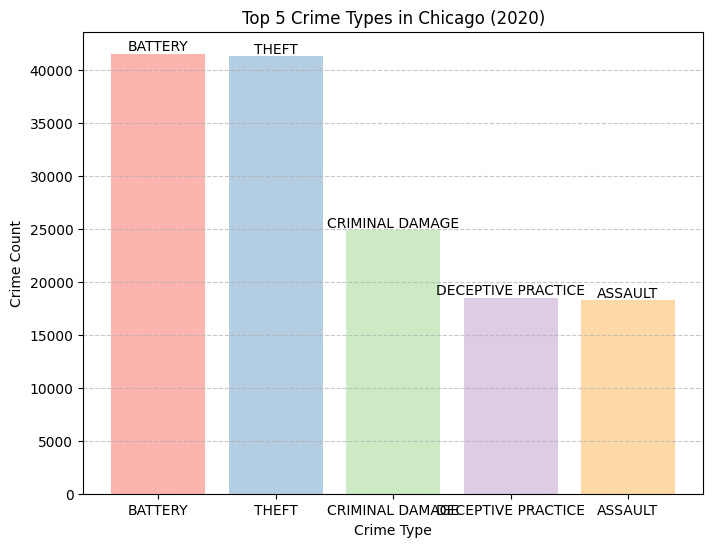

In [ ]:
# 2020년 데이터만 필터링
df_2020 = df[df['Year'] == 2020]

# 2020년 범죄 유형 개수 집계
crime_counts_2020 = df_2020.groupby('Primary Type').size().reset_index(name='Count')

# 상위 3개 범죄 유형 선택
top3_crimes_2020 = crime_counts_2020.nlargest(5, 'Count')

# 색상 팔레트 설정 (Pastel1)
palette_color = sns.color_palette('Pastel1', n_colors=5)

# 시각화
plt.figure(figsize=(8, 6))
plt.bar(top3_crimes_2020['Primary Type'], top3_crimes_2020['Count'], color=palette_color, alpha=1)

plt.xlabel("Crime Type")
plt.ylabel("Crime Count")
plt.title("Top 5 Crime Types in Chicago (2020)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 각 막대 위에 범죄 유형 라벨 추가
for i, row in top3_crimes_2020.iterrows():
    plt.text(row['Primary Type'], row['Count'], row['Primary Type'], ha='center', va='bottom', fontsize=10)

plt.show()

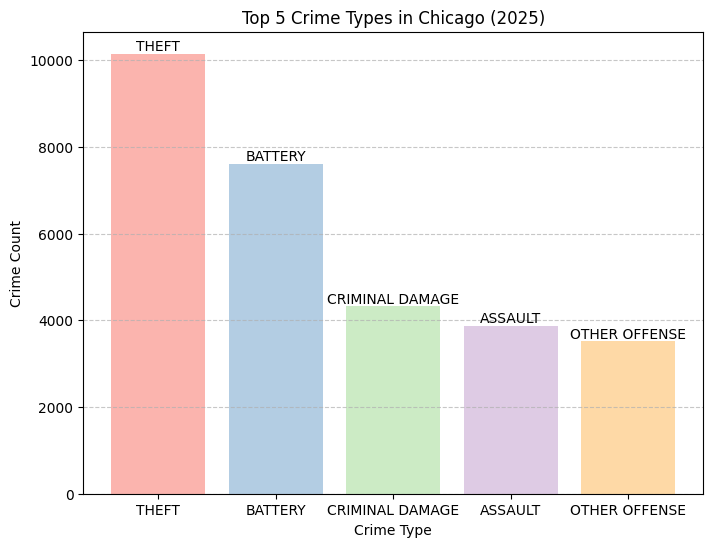

In [ ]:
# 2025년 데이터만 필터링
df_2025 = df[df['Year'] == 2025]

# 2025년 범죄 유형 개수 집계
crime_counts_2025 = df_2025.groupby('Primary Type').size().reset_index(name='Count')

# 상위 3개 범죄 유형 선택
top3_crimes_2025 = crime_counts_2025.nlargest(5, 'Count')

# 색상 팔레트 설정 (Pastel1)
palette_color = sns.color_palette('Pastel1', n_colors=5)

# 시각화
plt.figure(figsize=(8, 6))
plt.bar(top3_crimes_2025['Primary Type'], top3_crimes_2025['Count'], color=palette_color, alpha=1)

plt.xlabel("Crime Type")
plt.ylabel("Crime Count")
plt.title("Top 5 Crime Types in Chicago (2025)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 각 막대 위에 범죄 유형 라벨 추가
for i, row in top3_crimes_2025.iterrows():
    plt.text(row['Primary Type'], row['Count'], row['Primary Type'], ha='center', va='bottom', fontsize=10)

plt.show()

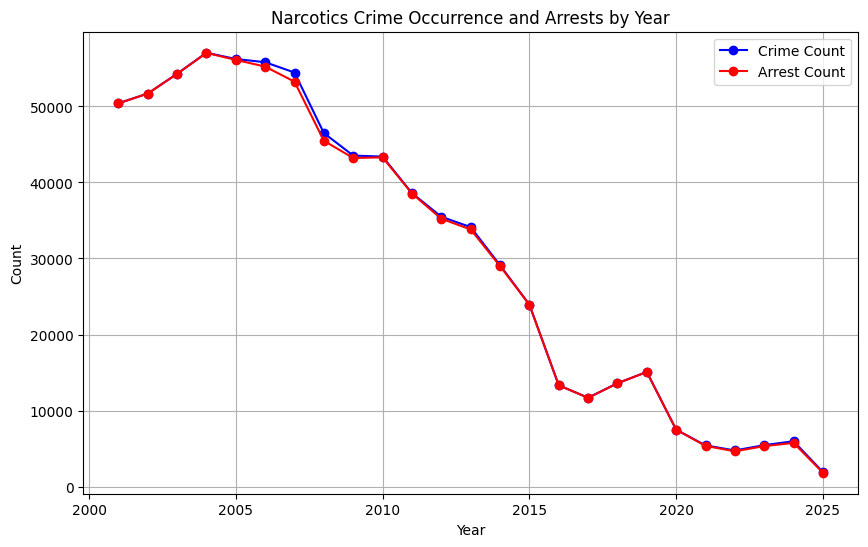

In [ ]:
import matplotlib.pyplot as plt

# 'Narcotics' 범죄 유형에 대한 데이터 필터링
narcotics_df = df[df['Primary Type'] == 'NARCOTICS']

# 연도별 발생 수 집계
narcotics_by_year = narcotics_df.groupby('Year').size().reset_index(name='Count')

# 연도별 체포 수 집계 (체포 정보가 "Arrest" 컬럼에 있는 경우)
narcotics_arrests_by_year = narcotics_df[narcotics_df['Arrest'] == True].groupby('Year').size().reset_index(name='Arrest Count')

# 시각화: 연도별 발생 수와 체포 수를 같은 그래프에 표시
plt.figure(figsize=(10, 6))

# 연도별 발생 수 그래프 (파란색)
plt.plot(narcotics_by_year['Year'], narcotics_by_year['Count'], marker='o', color='b', label='Crime Count')

# 연도별 체포 수 그래프 (빨간색)
plt.plot(narcotics_arrests_by_year['Year'], narcotics_arrests_by_year['Arrest Count'], marker='o', color='r', label='Arrest Count')

# 그래프 레이블
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Narcotics Crime Occurrence and Arrests by Year")

# 범례 추가
plt.legend()

# 그리드 추가
plt.grid(True)

# 그래프 출력
plt.show()


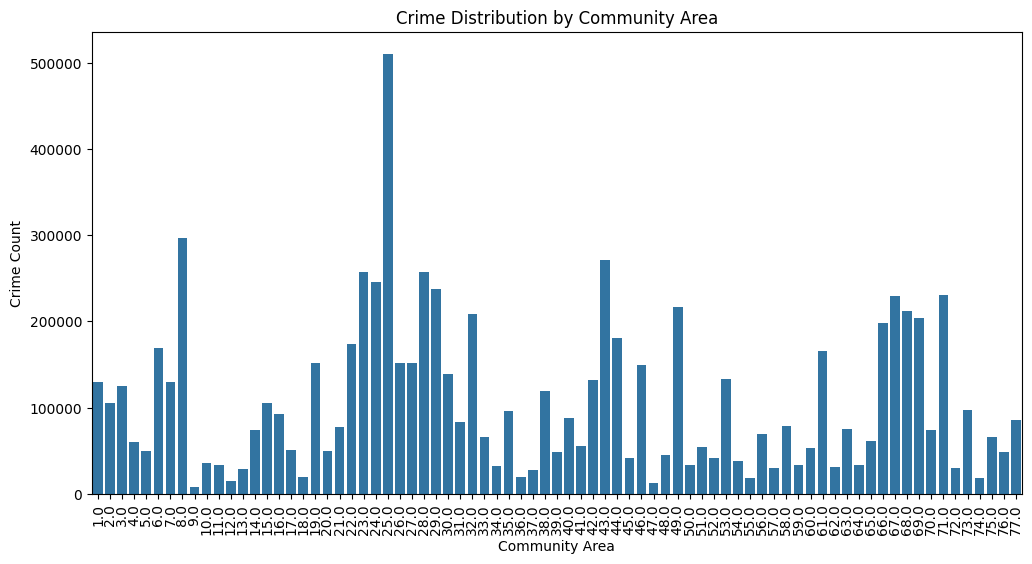

In [ ]:
# 지역별(Community Area) 범죄 발생 분석 (지역에 따른 범죄 발생)
crime_by_area = df.groupby('Community Area')['Primary Type'].count().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=crime_by_area.index, y=crime_by_area.values)
plt.title('Crime Distribution by Community Area')
plt.xlabel('Community Area')
plt.ylabel('Crime Count')
plt.xticks(rotation=90)
plt.show()

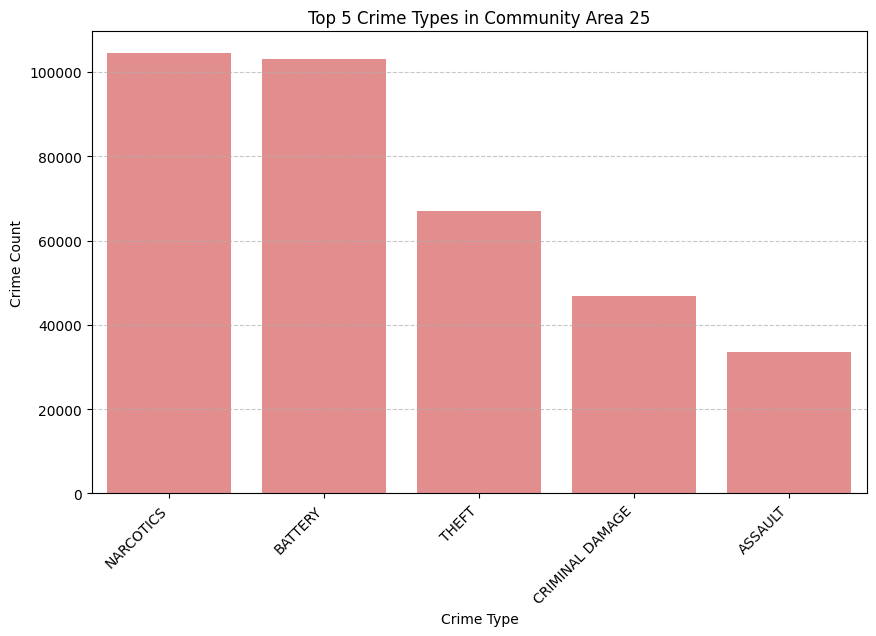

In [ ]:
# 25번 커뮤니티 영역의 데이터 필터링
crime_area_25 = df[df['Community Area'] == 25]

# 범죄 유형별 사건 수 집계
crime_by_type_area_25 = crime_area_25.groupby('Primary Type').size().sort_values(ascending=False)

# 상위 5개 범죄 유형 추출
top_5_crime_by_type_area_25 = crime_by_type_area_25.nlargest(5)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_crime_by_type_area_25.index, y=top_5_crime_by_type_area_25.values, color='lightcoral')
plt.title('Top 5 Crime Types in Community Area 25')
plt.xlabel('Crime Type')
plt.ylabel('Crime Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-84-384db3f239fb>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_crime_by_area.index, y=top_10_crime_by_area.values, palette='Pastel1')


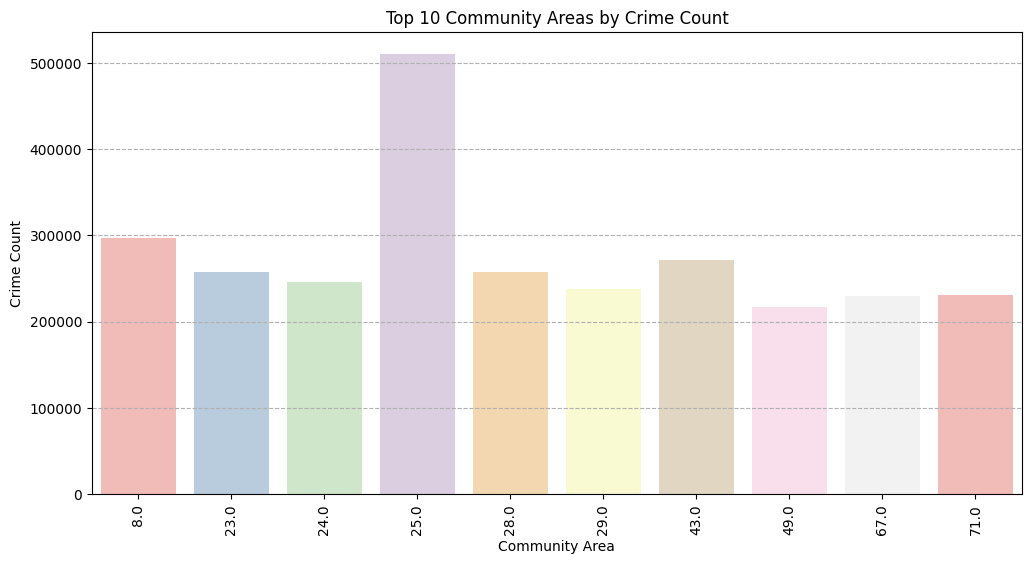

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 지역별 범죄 발생 건수 집계
crime_by_area = df.groupby('Community Area').size().sort_values(ascending=False)

# 상위 10개 지역 추출
top_10_crime_by_area = crime_by_area.head(10)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_crime_by_area.index, y=top_10_crime_by_area.values, palette='Pastel1')
plt.title('Top 10 Community Areas by Crime Count')
plt.xlabel('Community Area')
plt.ylabel('Crime Count')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()


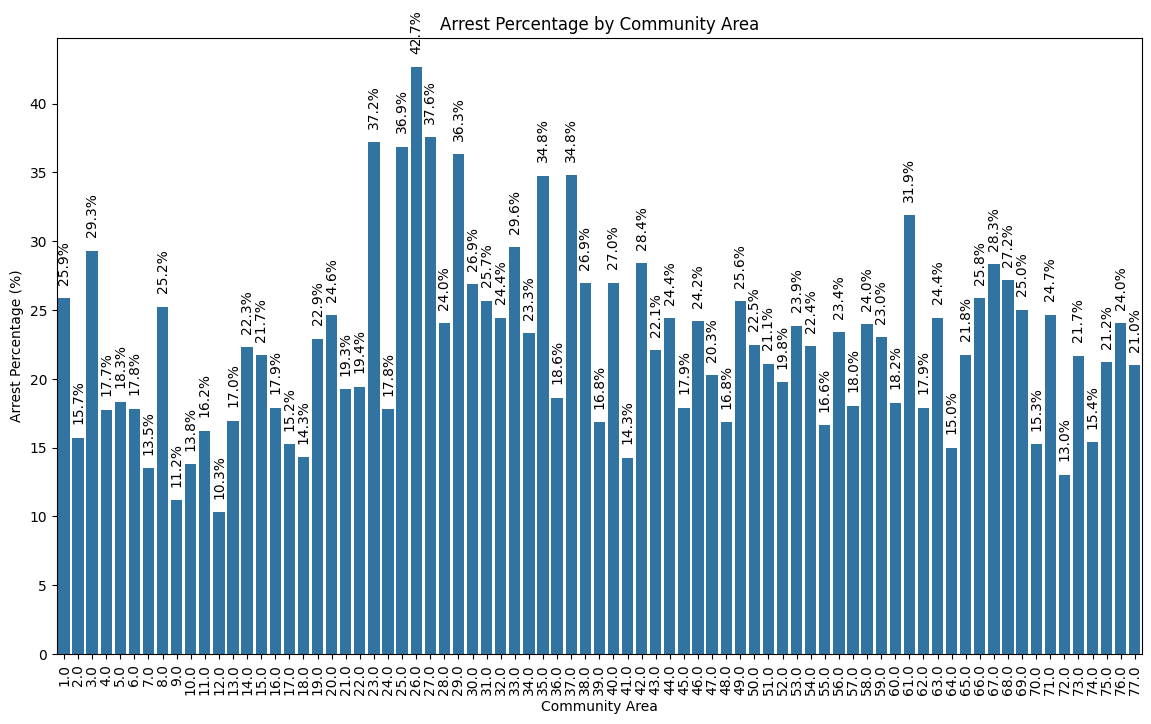

In [ ]:
# Community Area별 체포 여부 분석
community_arrest = df.groupby(['Community Area', 'Arrest']).size().unstack(fill_value=0)

# 체포된 비율 계산
community_arrest['Total'] = community_arrest.sum(axis=1)
community_arrest['Arrest Percentage'] = (community_arrest[True] / community_arrest['Total']) * 100

# 시각화 (Community Area별 체포 비율)
plt.figure(figsize=(14, 8))
sns.barplot(x=community_arrest.index, y=community_arrest['Arrest Percentage'])

# 그래프 제목 및 축 라벨 추가
plt.title('Arrest Percentage by Community Area')
plt.xlabel('Community Area')
plt.ylabel('Arrest Percentage (%)')

# x축 라벨 회전
plt.xticks(rotation=90)

# 막대 위에 퍼센트 값 표시
for i, v in enumerate(community_arrest['Arrest Percentage']):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom',rotation=90, fontsize=10)

plt.show()

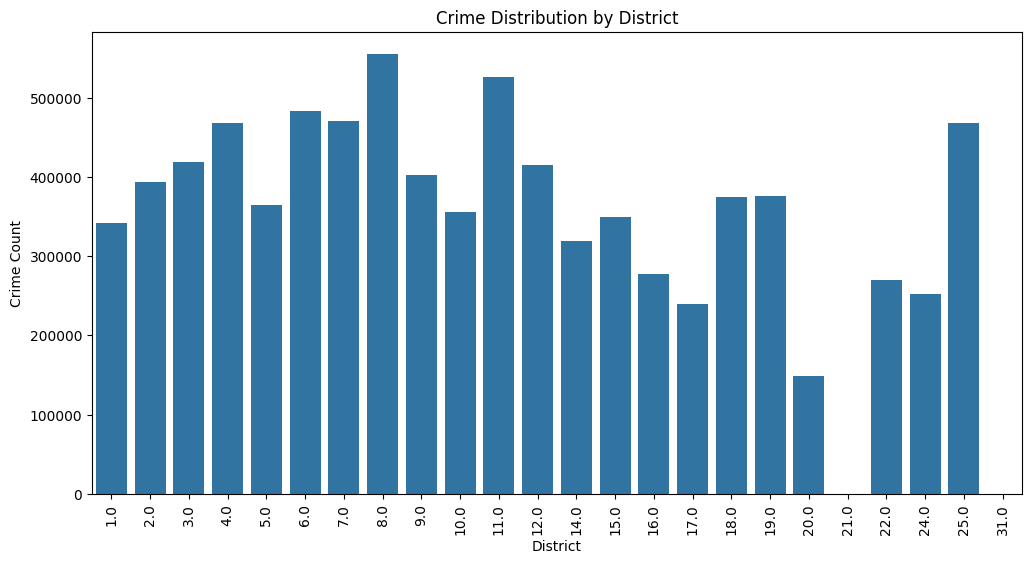

In [ ]:
# 지역별(District) 범죄 발생 분석 (지역에 따른 범죄 발생)
crime_by_area = df.groupby('District')['Primary Type'].count().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=crime_by_area.index, y=crime_by_area.values)
plt.title('Crime Distribution by District')
plt.xlabel('District')
plt.ylabel('Crime Count')
plt.xticks(rotation=90)
plt.show()

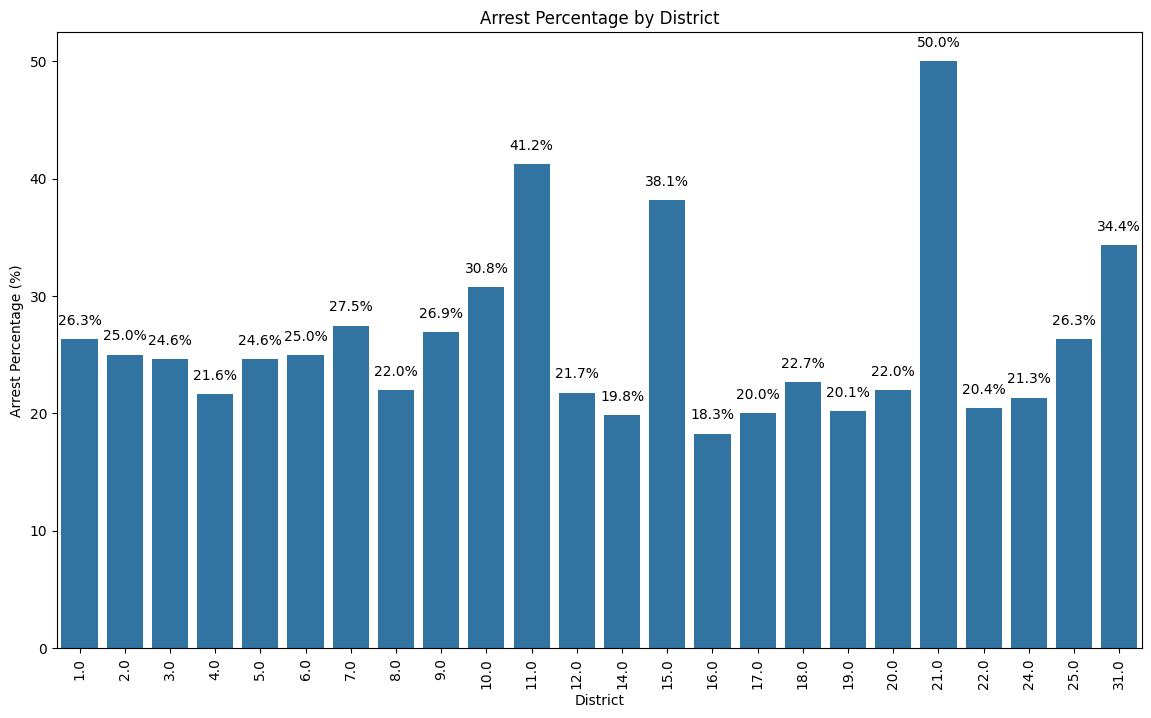

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# District별 체포 여부 분석
district_arrest = df.groupby(['District', 'Arrest']).size().unstack(fill_value=0)

# 체포된 비율 계산
district_arrest['Total'] = district_arrest.sum(axis=1)
district_arrest['Arrest Percentage'] = (district_arrest[True] / district_arrest['Total']) * 100

# 시각화 (District별 체포 비율)
plt.figure(figsize=(14, 8))
sns.barplot(x=district_arrest.index, y=district_arrest['Arrest Percentage'])

# 그래프 제목 및 축 라벨 추가
plt.title('Arrest Percentage by District')
plt.xlabel('District')
plt.ylabel('Arrest Percentage (%)')

# x축 라벨 회전
plt.xticks(rotation=90)

# 막대 위에 퍼센트 값 표시
for i, v in enumerate(district_arrest['Arrest Percentage']):
    plt.text(i, v +1, f"{v:.1f}%", ha='center', va='bottom', fontsize=10)

plt.show()

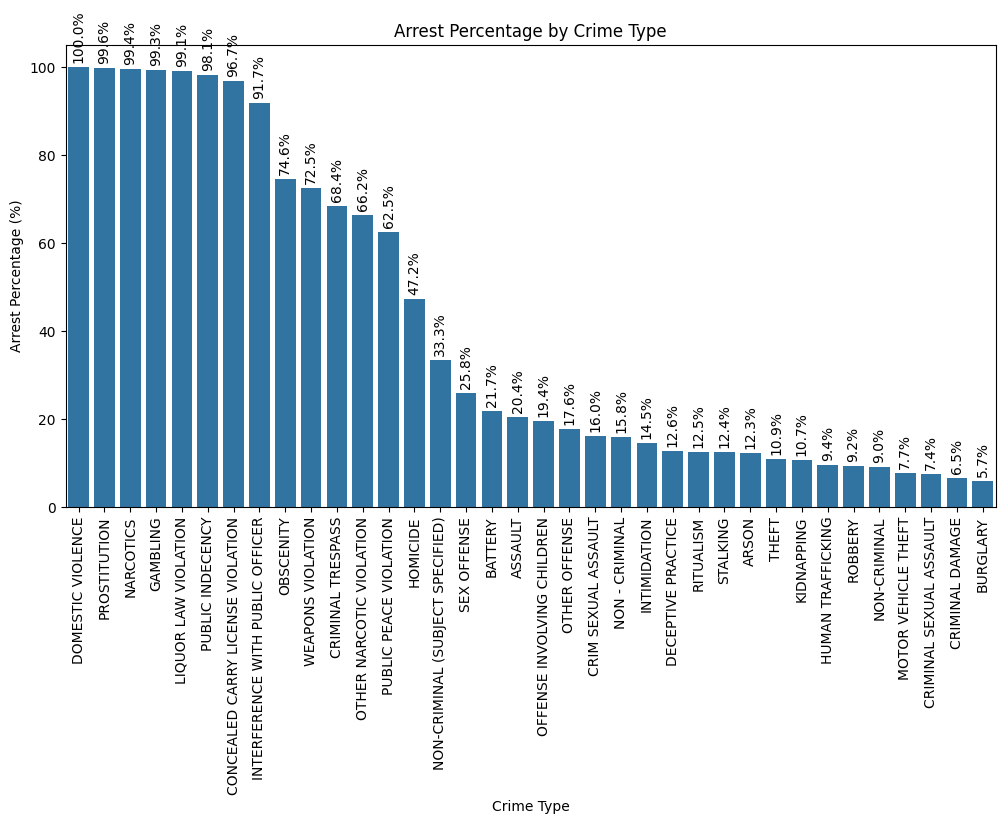

In [ ]:
# 범죄 유형별 체포 비율
import seaborn as sns
import matplotlib.pyplot as plt

# 'Arrest'와 'Primary Type'을 기준으로 그룹화하여 각 범죄 유형에 대해 체포가 얼마나 이루어졌는지 분석
crime_arrest = df.groupby(['Primary Type', 'Arrest']).size().unstack(fill_value=0)

# 체포된 비율 계산
crime_arrest['Total'] = crime_arrest.sum(axis=1)
crime_arrest['Arrest Percentage'] = (crime_arrest[True] / crime_arrest['Total']) * 100

# Arrest Percentage 기준 내림차순 정렬
crime_arrest_sorted = crime_arrest.sort_values('Arrest Percentage', ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=crime_arrest_sorted.index, y=crime_arrest_sorted['Arrest Percentage'])

# 그래프 제목 및 축 라벨 추가
plt.title('Arrest Percentage by Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Arrest Percentage (%)')

# x축 라벨 회전
plt.xticks(rotation=90)

# 막대 위에 퍼센트 값 표시
for i, v in enumerate(crime_arrest_sorted['Arrest Percentage']):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom',rotation=90, fontsize=10)

plt.show()

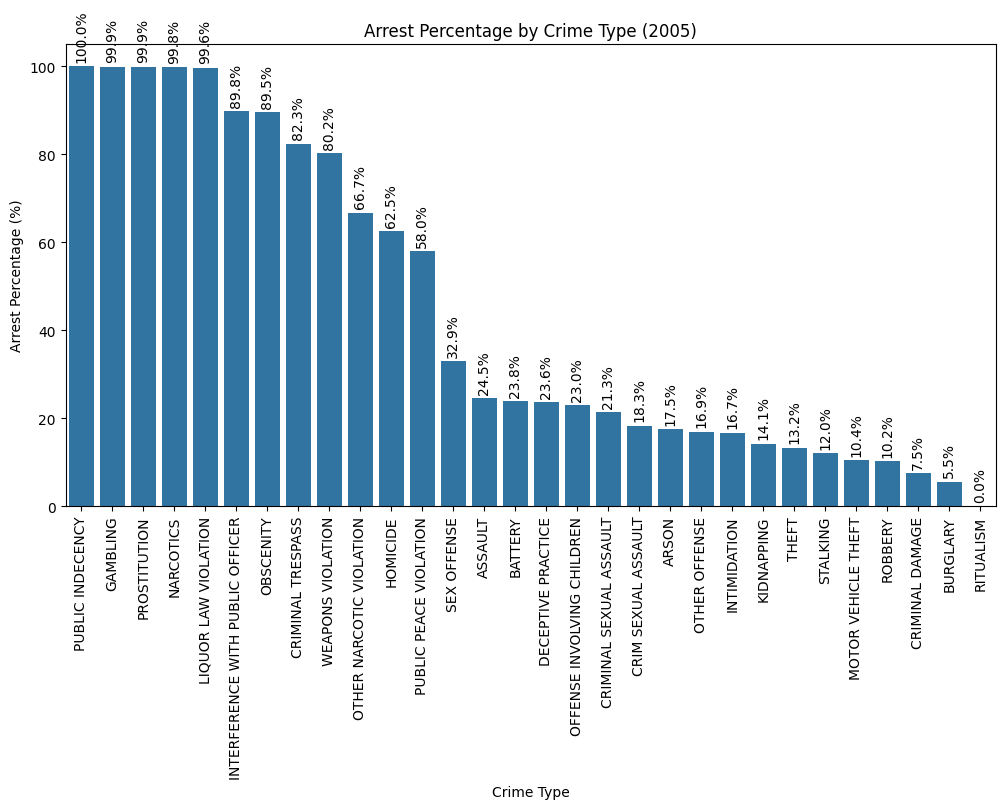

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2005년 데이터만 필터링
df_2005 = df[df['Year'] == 2005]

# 'Arrest'와 'Primary Type'을 기준으로 그룹화하여 각 범죄 유형에 대해 체포가 얼마나 이루어졌는지 분석
crime_arrest_2005 = df_2005.groupby(['Primary Type', 'Arrest']).size().unstack(fill_value=0)

# 체포된 비율 계산
crime_arrest_2005['Total'] = crime_arrest_2005.sum(axis=1)
crime_arrest_2005['Arrest Percentage'] = (crime_arrest_2005[True] / crime_arrest_2005['Total']) * 100

# Arrest Percentage 기준 내림차순 정렬
crime_arrest_2005_sorted = crime_arrest_2005.sort_values('Arrest Percentage', ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=crime_arrest_2005_sorted.index, y=crime_arrest_2005_sorted['Arrest Percentage'])

# 그래프 제목 및 축 라벨 추가
plt.title('Arrest Percentage by Crime Type (2005)')
plt.xlabel('Crime Type')
plt.ylabel('Arrest Percentage (%)')

# x축 라벨 회전
plt.xticks(rotation=90)

# 막대 위에 퍼센트 값 표시
for i, v in enumerate(crime_arrest_2005_sorted['Arrest Percentage']):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom', rotation=90, fontsize=10)

plt.show()

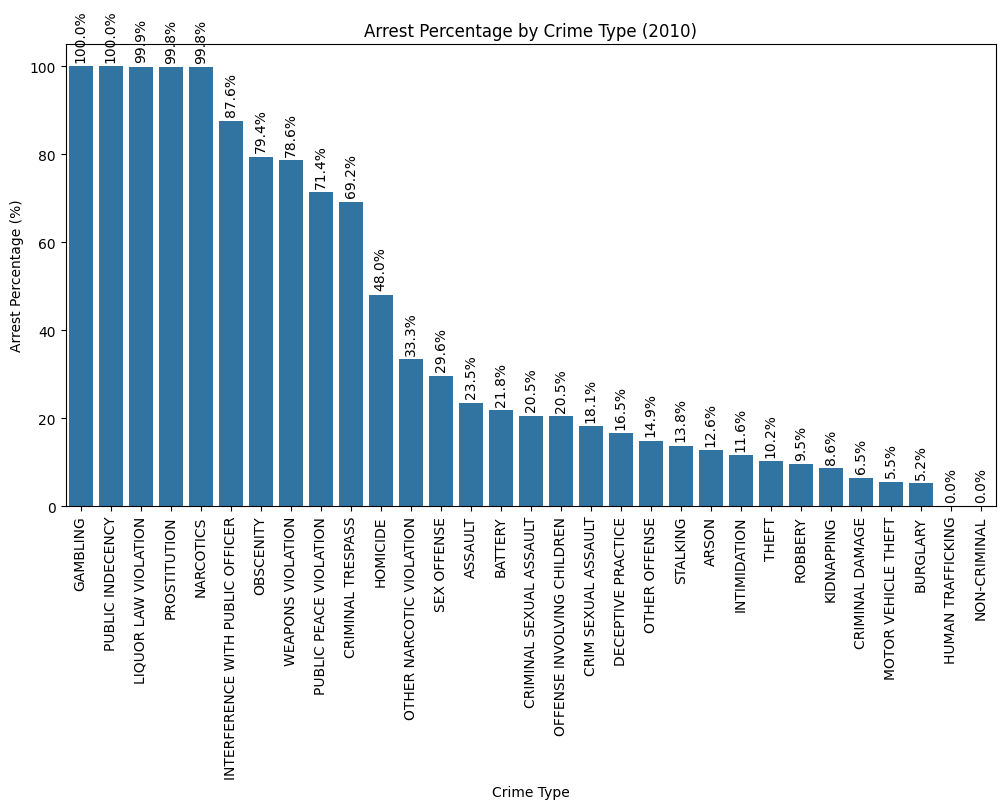

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2010년 데이터만 필터링
df_2010 = df[df['Year'] == 2010]

# 'Arrest'와 'Primary Type'을 기준으로 그룹화하여 각 범죄 유형에 대해 체포가 얼마나 이루어졌는지 분석
crime_arrest_2010 = df_2010.groupby(['Primary Type', 'Arrest']).size().unstack(fill_value=0)

# 체포된 비율 계산
crime_arrest_2010['Total'] = crime_arrest_2010.sum(axis=1)
crime_arrest_2010['Arrest Percentage'] = (crime_arrest_2010[True] / crime_arrest_2010['Total']) * 100

# Arrest Percentage 기준 내림차순 정렬
crime_arrest_2010_sorted = crime_arrest_2010.sort_values('Arrest Percentage', ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=crime_arrest_2010_sorted.index, y=crime_arrest_2010_sorted['Arrest Percentage'])

# 그래프 제목 및 축 라벨 추가
plt.title('Arrest Percentage by Crime Type (2010)')
plt.xlabel('Crime Type')
plt.ylabel('Arrest Percentage (%)')

# x축 라벨 회전
plt.xticks(rotation=90)

# 막대 위에 퍼센트 값 표시
for i, v in enumerate(crime_arrest_2010_sorted['Arrest Percentage']):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom', rotation=90, fontsize=10)

plt.show()

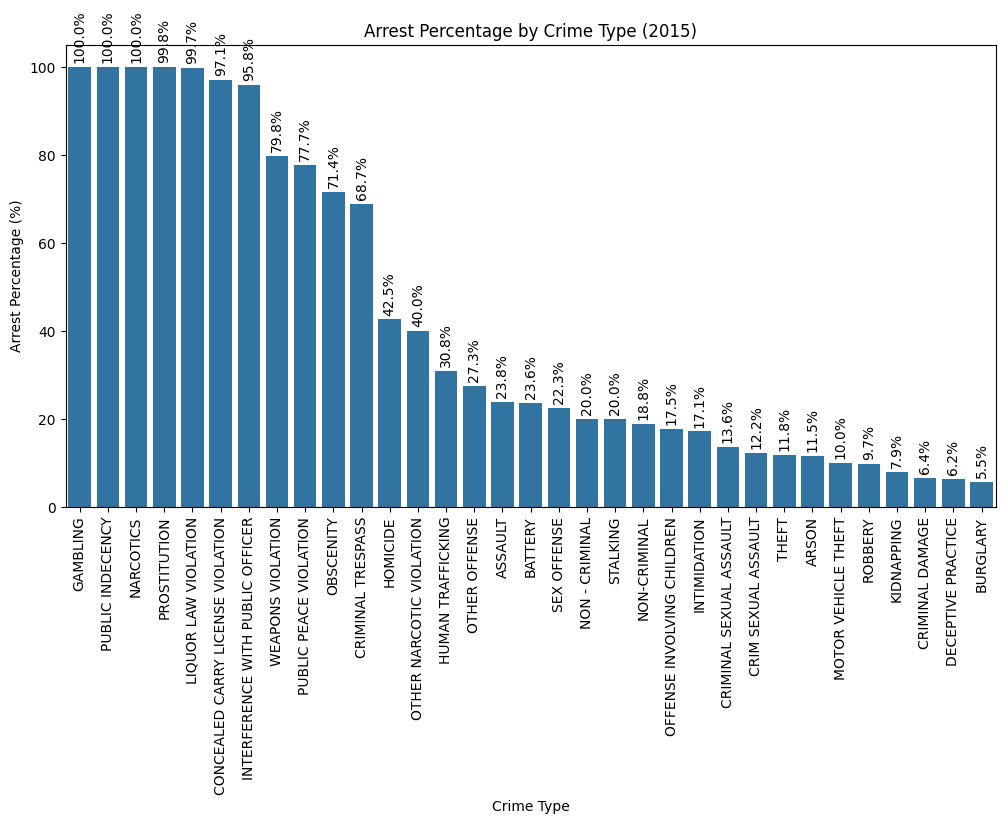

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2015년 데이터만 필터링
df_2015 = df[df['Year'] == 2015]

# 'Arrest'와 'Primary Type'을 기준으로 그룹화하여 각 범죄 유형에 대해 체포가 얼마나 이루어졌는지 분석
crime_arrest_2015 = df_2015.groupby(['Primary Type', 'Arrest']).size().unstack(fill_value=0)

# 체포된 비율 계산
crime_arrest_2015['Total'] = crime_arrest_2015.sum(axis=1)
crime_arrest_2015['Arrest Percentage'] = (crime_arrest_2015[True] / crime_arrest_2015['Total']) * 100

# Arrest Percentage 기준 내림차순 정렬
crime_arrest_2015_sorted = crime_arrest_2015.sort_values('Arrest Percentage', ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=crime_arrest_2015_sorted.index, y=crime_arrest_2015_sorted['Arrest Percentage'])

# 그래프 제목 및 축 라벨 추가
plt.title('Arrest Percentage by Crime Type (2015)')
plt.xlabel('Crime Type')
plt.ylabel('Arrest Percentage (%)')

# x축 라벨 회전
plt.xticks(rotation=90)

# 막대 위에 퍼센트 값 표시
for i, v in enumerate(crime_arrest_2015_sorted['Arrest Percentage']):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom', rotation=90, fontsize=10)

plt.show()


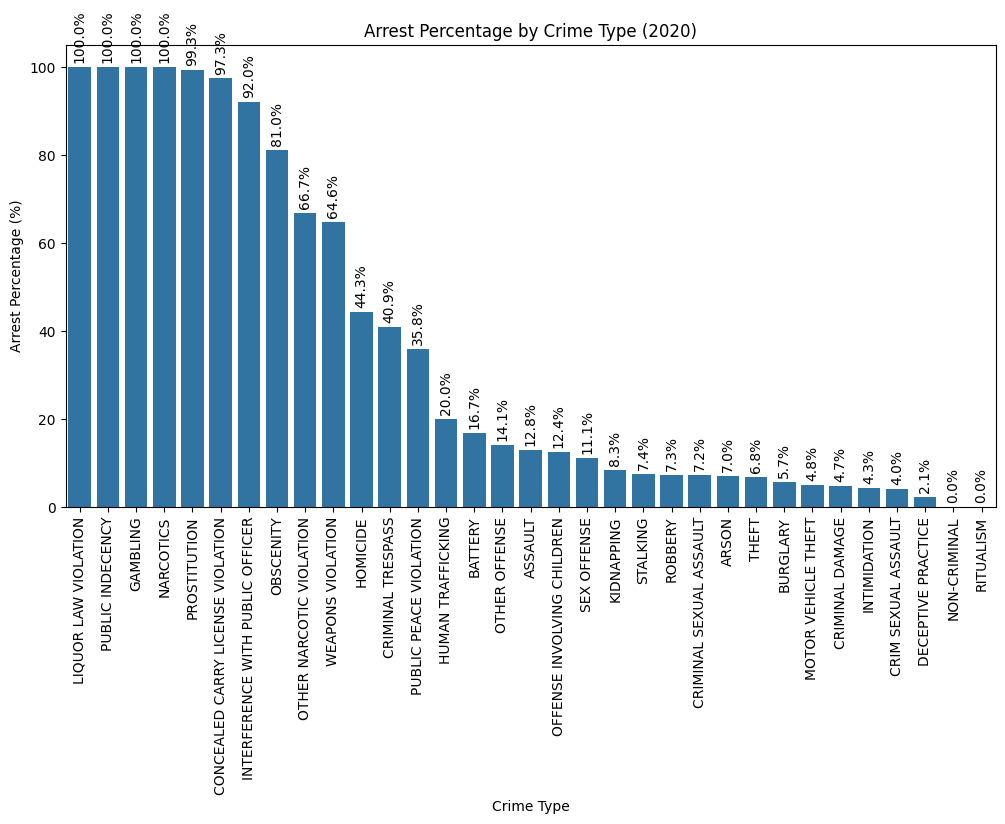

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2020년 데이터만 필터링
df_2020 = df[df['Year'] == 2020]

# 'Arrest'와 'Primary Type'을 기준으로 그룹화하여 각 범죄 유형에 대해 체포가 얼마나 이루어졌는지 분석
crime_arrest_2020 = df_2020.groupby(['Primary Type', 'Arrest']).size().unstack(fill_value=0)

# 체포된 비율 계산
crime_arrest_2020['Total'] = crime_arrest_2020.sum(axis=1)
crime_arrest_2020['Arrest Percentage'] = (crime_arrest_2020[True] / crime_arrest_2020['Total']) * 100

# Arrest Percentage 기준 내림차순 정렬
crime_arrest_2020_sorted = crime_arrest_2020.sort_values('Arrest Percentage', ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=crime_arrest_2020_sorted.index, y=crime_arrest_2020_sorted['Arrest Percentage'])

# 그래프 제목 및 축 라벨 추가
plt.title('Arrest Percentage by Crime Type (2020)')
plt.xlabel('Crime Type')
plt.ylabel('Arrest Percentage (%)')

# x축 라벨 회전
plt.xticks(rotation=90)

# 막대 위에 퍼센트 값 표시
for i, v in enumerate(crime_arrest_2020_sorted['Arrest Percentage']):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom', rotation=90, fontsize=10)

plt.show()

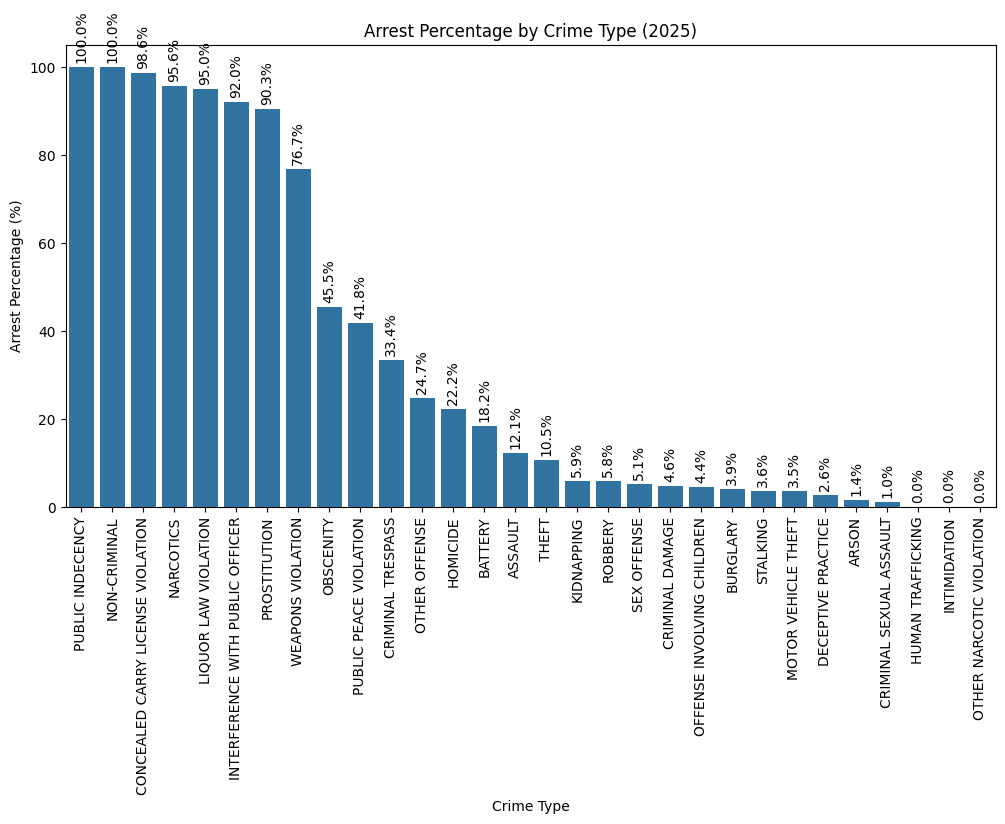

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2025년 데이터만 필터링
df_2025 = df[df['Year'] == 2025]

# 'Arrest'와 'Primary Type'을 기준으로 그룹화하여 각 범죄 유형에 대해 체포가 얼마나 이루어졌는지 분석
crime_arrest_2025 = df_2025.groupby(['Primary Type', 'Arrest']).size().unstack(fill_value=0)

# 체포된 비율 계산
crime_arrest_2025['Total'] = crime_arrest_2025.sum(axis=1)
crime_arrest_2025['Arrest Percentage'] = (crime_arrest_2025[True] / crime_arrest_2025['Total']) * 100

# Arrest Percentage 기준 내림차순 정렬
crime_arrest_2025_sorted = crime_arrest_2025.sort_values('Arrest Percentage', ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=crime_arrest_2025_sorted.index, y=crime_arrest_2025_sorted['Arrest Percentage'])

# 그래프 제목 및 축 라벨 추가
plt.title('Arrest Percentage by Crime Type (2025)')
plt.xlabel('Crime Type')
plt.ylabel('Arrest Percentage (%)')

# x축 라벨 회전
plt.xticks(rotation=90)

# 막대 위에 퍼센트 값 표시
for i, v in enumerate(crime_arrest_2025_sorted['Arrest Percentage']):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom', rotation=90, fontsize=10)

plt.show()


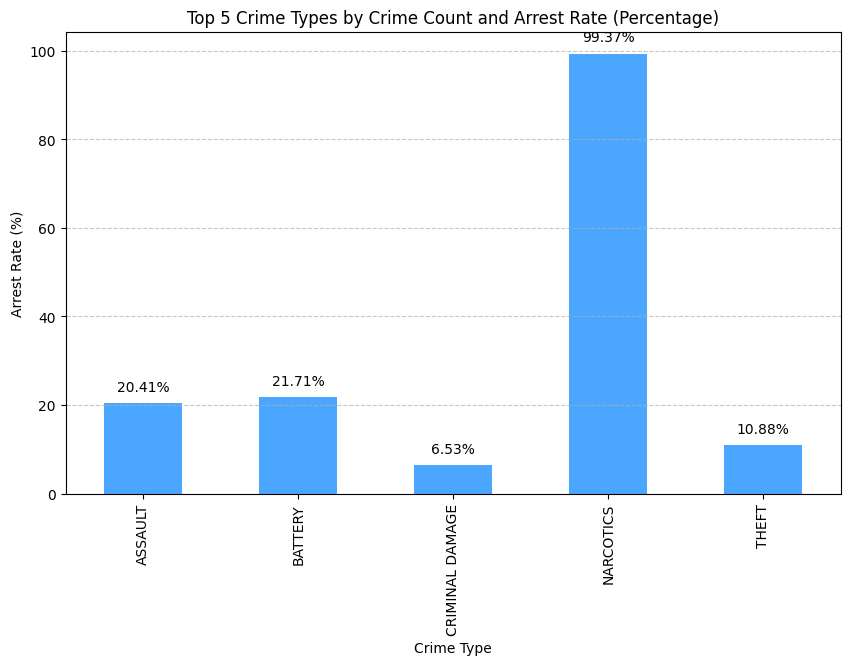

In [ ]:
# 범죄 유형별로 범죄 수를 집계
crime_counts = df['Primary Type'].value_counts().reset_index(name='Count')
crime_counts.columns = ['Primary Type', 'Count']

# 범죄 수가 많은 순서대로 정렬
crime_counts_sorted = crime_counts.sort_values(by='Count', ascending=False)

# 상위 5개 범죄 유형 선택
top5_crimes_by_count = crime_counts_sorted.head(5)

# Top 5 범죄 유형에 대한 데이터 필터링
df_top5_by_count = df[df['Primary Type'].isin(top5_crimes_by_count['Primary Type'])]

# 'Arrest'와 'Primary Type'을 기준으로 집계하여 체포된 경우와 체포되지 않은 경우 계산
arrest_counts_top5 = df_top5_by_count.groupby(['Primary Type', 'Arrest']).size().unstack(fill_value=0)

# 체포 비율 계산 (퍼센트로 변환)
arrest_counts_top5['Arrest Rate'] = (arrest_counts_top5[True] / (arrest_counts_top5[True] + arrest_counts_top5[False])) * 100

# 시각화 (세로 막대 그래프)
plt.figure(figsize=(10, 6))
arrest_counts_top5['Arrest Rate'].plot(kind='bar', color='dodgerblue', alpha=0.8)

plt.xlabel("Crime Type")
plt.ylabel("Arrest Rate (%)")
plt.title("Top 5 Crime Types by Crime Count and Arrest Rate (Percentage)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 각 막대 위에 체포 비율 퍼센트 표시
for i, v in enumerate(arrest_counts_top5['Arrest Rate']):
    plt.text(i, v + 2, f"{v:.2f}%", ha='center', va='bottom', fontsize=10)

plt.show()

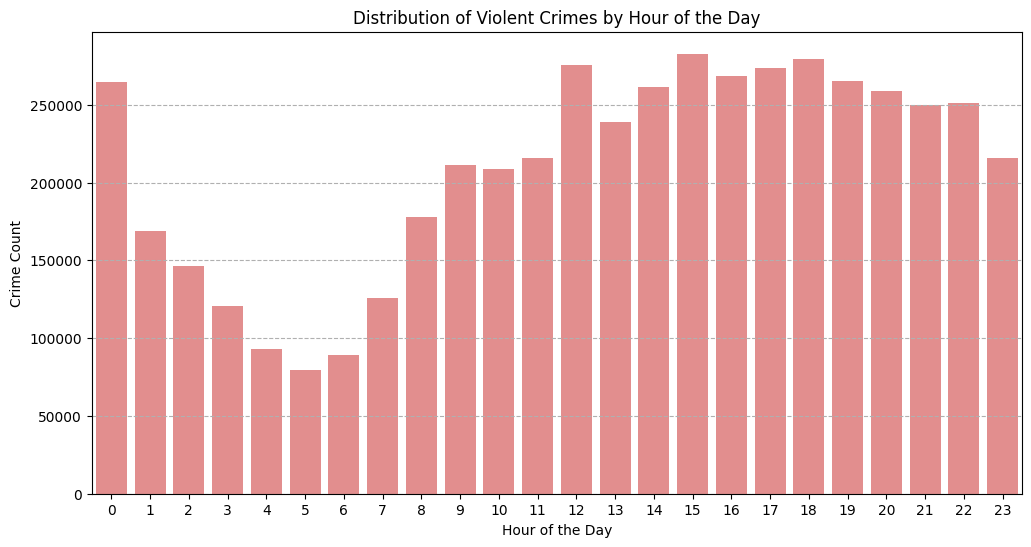

In [ ]:
# 강력범죄 목록
violent = ['HOMICIDE', 'CRIMINAL SEXUAL ASSAULT', 'ROBBERY', 'BATTERY', 'RITUALISM', 'ASSAULT', 'BURGLARY', 'THEFT', 'MOTOR VEHICLE THEFT', 'ARSON', 'HUMAN TRAFFICKING']

# 강력범죄 데이터 필터링
vio = df[df['Primary Type'].isin(violent)].copy()

# 'Date' 열을 datetime 형식으로 변환
vio['Date'] = pd.to_datetime(vio['Date'])

# 'Hour' 열 생성 (시간대별 분석)
vio['Hour'] = vio['Date'].dt.hour

# 시간대별 강력범죄 발생 건수 계산
vio_hour_counts = vio['Hour'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(12, 6))

# 진한 핑크색 지정
sns.barplot(x=vio_hour_counts.index, y=vio_hour_counts.values, color='lightcoral')

# 그래프 제목 및 축 라벨 설정
plt.title('Distribution of Violent Crimes by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Crime Count')

# 시각화 출력
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()


<ipython-input-95-761fc4e5bfc3>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vio_hour_counts.index, y=vio_hour_counts.values, palette='Pastel1')


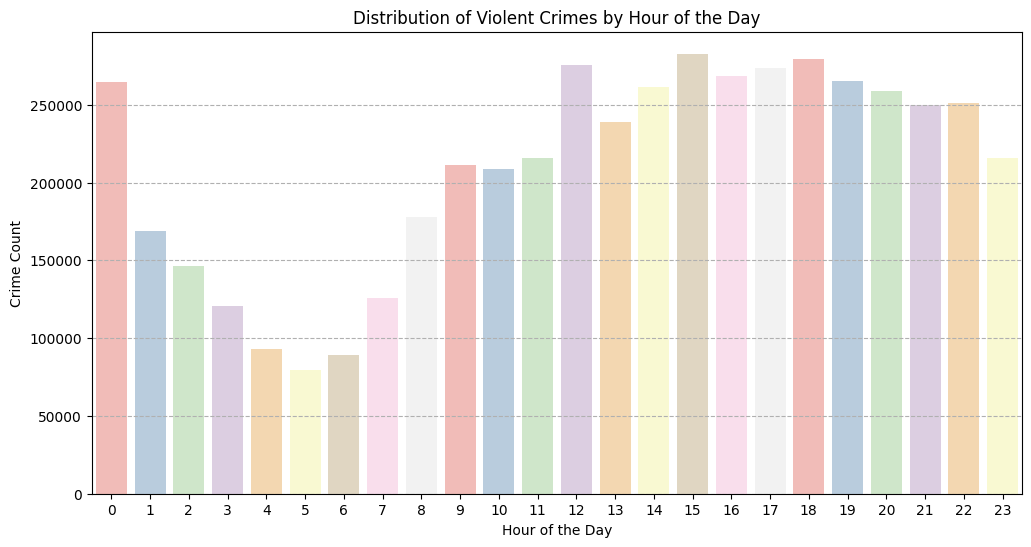

In [ ]:
# 강력범죄 목록
violent = ['HOMICIDE', 'CRIMINAL SEXUAL ASSAULT', 'ROBBERY', 'BATTERY', 'RITUALISM', 'ASSAULT', 'BURGLARY', 'THEFT', 'MOTOR VEHICLE THEFT', 'ARSON', 'HUMAN TRAFFICKING']

# 강력범죄 데이터 필터링
vio = df[df['Primary Type'].isin(violent)].copy()

# 'Date' 열을 datetime 형식으로 변환
vio['Date'] = pd.to_datetime(vio['Date'])

# 'Hour' 열 생성 (시간대별 분석)
vio['Hour'] = vio['Date'].dt.hour

# 시간대별 강력범죄 발생 건수 계산
vio_hour_counts = vio['Hour'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=vio_hour_counts.index, y=vio_hour_counts.values, palette='Pastel1')

# 그래프 제목 및 축 라벨 설정
plt.title('Distribution of Violent Crimes by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Crime Count')

# 시각화 출력
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()

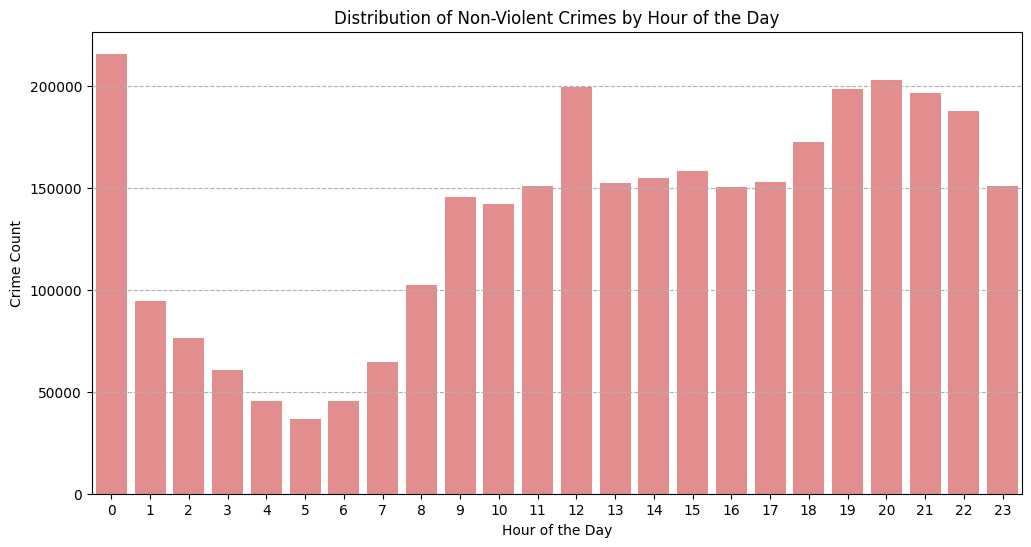

In [ ]:
# 강력범죄 목록
violent = ['HOMICIDE', 'CRIMINAL SEXUAL ASSAULT', 'ROBBERY', 'BATTERY', 'RITUALISM', 'ASSAULT', 'BURGLARY', 'THEFT', 'MOTOR VEHICLE THEFT', 'ARSON', 'HUMAN TRAFFICKING']

# 강력범죄 목록을 제외한 데이터 필터링
non_violent = df[~df['Primary Type'].isin(violent)].copy()

# 'Date' 열을 datetime 형식으로 변환
non_violent['Date'] = pd.to_datetime(non_violent['Date'])

# 'Hour' 열 생성 (시간대별 분석)
non_violent['Hour'] = non_violent['Date'].dt.hour

# 시간대별 강력범죄 아닌 발생 건수 계산
non_violent_hour_counts = non_violent['Hour'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(12, 6))

# 진한 핑크색으로 시각화
sns.barplot(x=non_violent_hour_counts.index, y=non_violent_hour_counts.values, color='lightcoral')

# 그래프 제목 및 축 라벨 설정
plt.title('Distribution of Non-Violent Crimes by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Crime Count')

# 시각화 출력
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()